# Analysis on the Natural Disasters' Impact on Endangered Species in Biodiverse Ecosystems

# Overview

# Importing Library

In [2]:
#%%bash
#pip install numpy pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialise Dataframe

In [3]:
df_amphibia = pd.read_excel('./Dataset/overall_AMPHIBIA.xlsx', header=1)
df_aves = pd.read_excel('./Dataset/overall_AVES.xlsx', header=1)
df_mammalia = pd.read_excel('./Dataset/overall_MAMMALIA.xlsx', header=1)
df_reptilia = pd.read_excel('./Dataset/overall_REPTILIA.xlsx', header=1)

# Ampibhia Dataset

In [4]:
print(f'There are total {len(df_amphibia)} rows and {len(df_amphibia.columns)} columns in datase overall_AMPHIBIA.xlsx ','\n')

conservation_status = df_amphibia['redlistCategory'].unique()
conservation_status_n = df_amphibia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_amphibia.info()

df_amphibia

There are total 1183 rows and 41 columns in datase overall_AMPHIBIA.xlsx  

There are 6 status which consist of f['Endangered' 'Vulnerable' 'Critically Endangered' 'Data Deficient'
 'Near Threatened' 'Least Concern']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 1183 non-null   object 
 1   orderName                                 1183 non-null   object 
 2   familyName                                1183 non-null   object 
 3   binomial                                  1183 non-null   object 
 4   range_size_ear                            598 non-null    float64
 5   total_perc_afected_ear                    598 non-null    float64
 6   total_perc_afected_pixel_ear              598 non-null    float64
 7   range_n_cells_ear              

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,AMPHIBIA,ANURA,HYPEROLIIDAE,Afrixalus knysnae,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Afrotropical,mainland,<strong><em>Conservation Actions</em></strong>...,Endangered,NaN
1,AMPHIBIA,ANURA,PHYLLOMEDUSIDAE,Agalychnis annae,966.137070,96.278322,62.5,8.0,0.498351,6.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,mainland,<strong><em>Conservation Actions In-Place</em>...,Vulnerable,NaN
2,AMPHIBIA,ANURA,MANTELLIDAE,Aglyptodactylus australis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Afrotropical,island,<strong><em>Conservation Actions</em></strong>...,Endangered,NaN
3,AMPHIBIA,ANURA,MANTELLIDAE,Aglyptodactylus laticeps,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,0.417476,2.0,risk,risk,Afrotropical,island,<strong><em>Conservation Actions</em></strong>...,Vulnerable,NaN
4,AMPHIBIA,ANURA,CERATOBATRACHIDAE,Alcalus mariae,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Indomalayan,island,<p><strong><em>Conservation Actions<br/></em><...,Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus owstoni,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.935742,53.0,high-risk,high-risk,Indomalayan,island,<strong><em>Conservation Actions In-Place<br/>...,Near Threatened,NaN
1179,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus pinglongensis,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.218241,2.0,risk,risk,Indomalayan,mainland,<em><strong>Conservation Actions In-Place</str...,Data Deficient,NaN
1180,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus prasinatus,875.019532,2.592869,50.0,2.0,0.401926,1.0,...,2.0,0.878913,30.0,high-risk,high-risk,Indomalayan,island,<strong><em>Conservation Actions In-Place</em>...,Near Threatened,NaN
1181,AMPHIBIA,ANURA,RHACOPHORIDAE,Zhangixalus viridis,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.918575,60.0,high-risk,high-risk,Indomalayan,island,Its range includes a few protected areas.,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [5]:
df_amphibia = df_amphibia[df_amphibia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]


try:
    df_amphibia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")


Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_33016\1526312887.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amphibia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Aves Dataset

In [6]:
print(f'There are total {len(df_aves)} rows and {len(df_aves.columns)} columns in datase overall_AVES.xlsx ','\n')

conservation_status = df_aves['redlistCategory'].unique()
conservation_status_n = df_aves['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_aves.info()

df_aves

There are total 632 rows and 41 columns in datase overall_AVES.xlsx  

There are 6 status which consist of f['Endangered' 'Vulnerable' 'Least Concern' 'Critically Endangered'
 'Near Threatened' 'Data Deficient']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 632 non-null    object 
 1   orderName                                 632 non-null    object 
 2   familyName                                632 non-null    object 
 3   binomial                                  632 non-null    object 
 4   range_size_ear                            246 non-null    float64
 5   total_perc_afected_ear                    246 non-null    float64
 6   total_perc_afected_pixel_ear              246 non-null    float64
 7   range_n_cells_ear                     

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,AVES,ACCIPITRIFORMES,ACCIPITRIDAE,Accipiter gundlachi,107392.921710,0.004013,1.265823,79.0,0.548800,1.0,...,79.0,0.407884,91.0,high-risk,high-risk,Neotropical,island,<strong>Conservation and Research Actions Unde...,Endangered,NaN
1,AVES,ACCIPITRIFORMES,ACCIPITRIDAE,Accipiter henstii,NaN,NaN,NaN,NaN,NaN,NaN,...,253.0,0.200869,197.0,risk,risk,Afrotropical,island,<strong>Conservation Actions Underway</strong>...,Vulnerable,NaN
2,AVES,PASSERIFORMES,STURNIDAE,Acridotheres melanopterus,136909.294079,21.419027,18.085106,94.0,0.471021,23.0,...,94.0,0.021277,1.0,risk,risk,Indomalayan|Oceanian,island,<strong>Conservation and Research Actions Unde...,Endangered,NaN
3,AVES,PASSERIFORMES,ACROCEPHALIDAE,Acrocephalus aequinoctialis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Oceanian,island,<strong>Conservation Actions Underway</strong>...,Endangered,NaN
4,AVES,PASSERIFORMES,ACROCEPHALIDAE,Acrocephalus atyphus,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,0.407884,10.0,risk,risk,Oceanian,island,Conservation Actions Needed/Occurs in at least...,Least Concern,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops splendidus,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,<strong>Conservation Actions Underway</strong>...,Least Concern,NaN
628,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops superciliosus,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.210541,4.0,risk,risk,Oceanian,island,Conservation Actions Needed,Least Concern,NaN
629,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterops vellalavella,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Oceanian,island,<strong>Conservation Actions Underway</strong>...,Near Threatened,NaN
630,AVES,PASSERIFORMES,ZOSTEROPIDAE,Zosterornis latistriatus,318.765551,11.677410,20.000000,5.0,0.556669,1.0,...,5.0,0.624132,16.0,high-risk,high-risk,Indomalayan,island,<strong>Conservation Actions Underway</strong>...,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [7]:
df_aves = df_aves[df_aves['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]



try:
    df_aves.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")

Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_33016\2881992994.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aves.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Mammalia Dataset

In [8]:
print(f'There are total {len(df_mammalia)} rows and {len(df_mammalia.columns)} columns in datase overall_MAMMALIA.xlsx ','\n')

conservation_status = df_mammalia['redlistCategory'].unique()
conservation_status_n = df_mammalia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_mammalia.info()

df_mammalia

There are total 405 rows and 41 columns in datase overall_MAMMALIA.xlsx  

There are 6 status which consist of f['Data Deficient' 'Endangered' 'Vulnerable' 'Critically Endangered'
 'Least Concern' 'Near Threatened']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 405 non-null    object 
 1   orderName                                 405 non-null    object 
 2   familyName                                405 non-null    object 
 3   binomial                                  405 non-null    object 
 4   range_size_ear                            144 non-null    float64
 5   total_perc_afected_ear                    144 non-null    float64
 6   total_perc_afected_pixel_ear              144 non-null    float64
 7   range_n_cells_ear                 

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,MAMMALIA,RODENTIA,MURIDAE,Abditomys latidens,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.826409,24.0,high-risk,high-risk,Indomalayan,island,The northern record is from Mount Data Nationa...,Data Deficient,NaN
1,MAMMALIA,RODENTIA,ABROCOMIDAE,Abrocoma uspallata,14.358080,100.000000,100.000000,1.0,0.258065,1.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,mainland,The species does not occur in any protected ar...,Data Deficient,NaN
2,MAMMALIA,CHIROPTERA,PTEROPODIDAE,Acerodon humilis,935.348691,21.262564,33.333333,3.0,0.564387,1.0,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,<strong><u>Current conservation efforts</u></s...,Endangered,NaN
3,MAMMALIA,CARNIVORA,URSIDAE,Ailuropoda melanoleuca,25788.748232,11.680239,14.285714,56.0,0.456813,10.0,...,NaN,NaN,NaN,NaN,NaN,Indomalayan|Palearctic,mainland,The Giant Panda has been the focus of one of t...,Vulnerable,NaN
4,MAMMALIA,DIPROTODONTIA,PHALANGERIDAE,Ailurops melanotis,87.455890,100.000000,100.000000,1.0,0.564387,1.0,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,Riley (2002) states that the key site for the ...,Critically Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,MAMMALIA,RODENTIA,MURIDAE,Uromys boeadii,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australasian,island,It is not known if this species is present in ...,Critically Endangered,NaN
401,MAMMALIA,RODENTIA,MURIDAE,Uromys hadrourus,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.104008,2.0,risk,risk,Australasian,mainland,Most of the population of this species is loca...,Near Threatened,NaN
402,MAMMALIA,RODENTIA,NESOMYIDAE,Voalavo antsahabensis,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.021277,4.0,risk,risk,Afrotropical,island,The species is found in&#160;Complexe Anjozoro...,Endangered,NaN
403,MAMMALIA,RODENTIA,NESOMYIDAE,Voalavo gymnocaudus,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.577465,5.0,high-risk,high-risk,Afrotropical,island,It is present in the Anjanaharibe-Sud Reserve ...,Least Concern,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [9]:
df_mammalia = df_mammalia[df_mammalia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]

try:
    df_mammalia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")



Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_33016\1204282931.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mammalia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# Reptilia Dataset

In [10]:
print(f'There are total {len(df_reptilia)} rows and {len(df_reptilia.columns)} columns in datase overall_MAMMALIA.xlsx ','\n')

conservation_status = df_reptilia['redlistCategory'].unique()
conservation_status_n = df_reptilia['redlistCategory'].nunique()

print(f"There are {conservation_status_n} status which consist of f{conservation_status}\n")

df_reptilia.info()

df_reptilia

There are total 1502 rows and 41 columns in datase overall_MAMMALIA.xlsx  

There are 6 status which consist of f['Vulnerable' 'Endangered' 'Least Concern' 'Data Deficient'
 'Critically Endangered' 'Near Threatened']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   className                                 1502 non-null   object 
 1   orderName                                 1502 non-null   object 
 2   familyName                                1502 non-null   object 
 3   binomial                                  1502 non-null   object 
 4   range_size_ear                            477 non-null    float64
 5   total_perc_afected_ear                    477 non-null    float64
 6   total_perc_afected_pixel_ear              477 non-null    float64
 7   range_n_cells_ear              

,className,orderName,familyName,binomial,range_size_ear,total_perc_afected_ear,total_perc_afected_pixel_ear,range_n_cells_ear,avg_impact_sum_final_ear,earthquakes_freq,...,range_n_cells_hur,avg_impact_sum_final_hur,hurricanes_freq,classification_absolute_intersection.2,classification_binary_pixel_based.2,realm,distribuition,conservation_actions,redlistCategory,greenStatus
0,REPTILIA,SQUAMATA,ANGUIDAE,Abronia anzuetoi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Neotropical,island,This species is not present in any protected a...,Vulnerable,NaN
1,REPTILIA,SQUAMATA,ANGUIDAE,Abronia chiszari,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.021277,3.0,risk,risk,Neotropical,island,It is present within the protected area of Los...,Endangered,NaN
2,REPTILIA,SQUAMATA,ANGUIDAE,Abronia graminea,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.021277,2.0,risk,risk,Neotropical,island,"It occurs in two protected areas, in el Ca√±on...",Endangered,NaN
3,REPTILIA,SQUAMATA,ANGUIDAE,Abronia lythrochila,1894.703024,5.225890,14.285714,7.0,0.189547,1.0,...,NaN,NaN,NaN,NaN,NaN,Neotropical,island,This species has been recorded in the Lagos de...,Least Concern,NaN
4,REPTILIA,SQUAMATA,ANGUIDAE,Abronia martindelcampoi,1906.883013,49.911152,33.333333,6.0,0.576280,3.0,...,6.0,0.021277,2.0,risk,risk,Neotropical,island,The species has been recorded from the Omiltem...,Endangered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,REPTILIA,SQUAMATA,XENOSAURIDAE,Xenosaurus phalaroanthereon,41.372665,65.890754,50.000000,2.0,0.524274,1.0,...,2.0,0.021277,1.0,risk,risk,Neotropical,mainland,It has not been recorded from any protected ar...,Data Deficient,NaN
1498,REPTILIA,SQUAMATA,XENOSAURIDAE,Xenosaurus rectocollaris,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.021277,2.0,risk,risk,Neotropical,mainland,The species occurs in the Tehuacan Valley Bios...,Least Concern,NaN
1499,REPTILIA,SQUAMATA,TYPHLOPIDAE,Xenotyphlops mocquardi,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.470122,1.0,high-risk,high-risk,Afrotropical,island,There are no conservation measures in place fo...,Data Deficient,NaN
1500,REPTILIA,SQUAMATA,GERRHOSAURIDAE,Zonosaurus haraldmeieri,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,0.470122,4.0,high-risk,high-risk,Afrotropical,island,There are no known species-specific conservati...,Near Threatened,NaN


Under redlistCategory column, there is one status called Data Deficient and since we will not need this in our analysis, we will drop it. We will also drop tsunami for the natural disasters and only use three natural disasters which comprise earthquake, volcanoes, and hurricanes.

In [11]:
df_reptilia = df_reptilia[df_reptilia['redlistCategory'] != 'Data Deficient'] # to drop Data Deficient

columns_to_drop = [
    'range_size_tsu',
    'total_perc_afected_tsu',
    'total_perc_afected_pixel_tsu',
    'range_n_cells_tsu',
    'avg_impact_sum_final_tsu',
    'tsunamis_freq',
    'classification_absolute_intersection_tsu',
    'classification_binary_pixel_based_tsu'
]

try:
    df_reptilia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis
    print("Columns dropped")
except:
    print("Columns already dropped before")




Columns dropped


C:\Users\jovian sanjaya putra\AppData\Local\Temp\ipykernel_33016\4207432600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reptilia.drop(columns=columns_to_drop, inplace=True) # to drop tsunamis


# How is the Comparison of Conservation Status across Taxonomic Class?

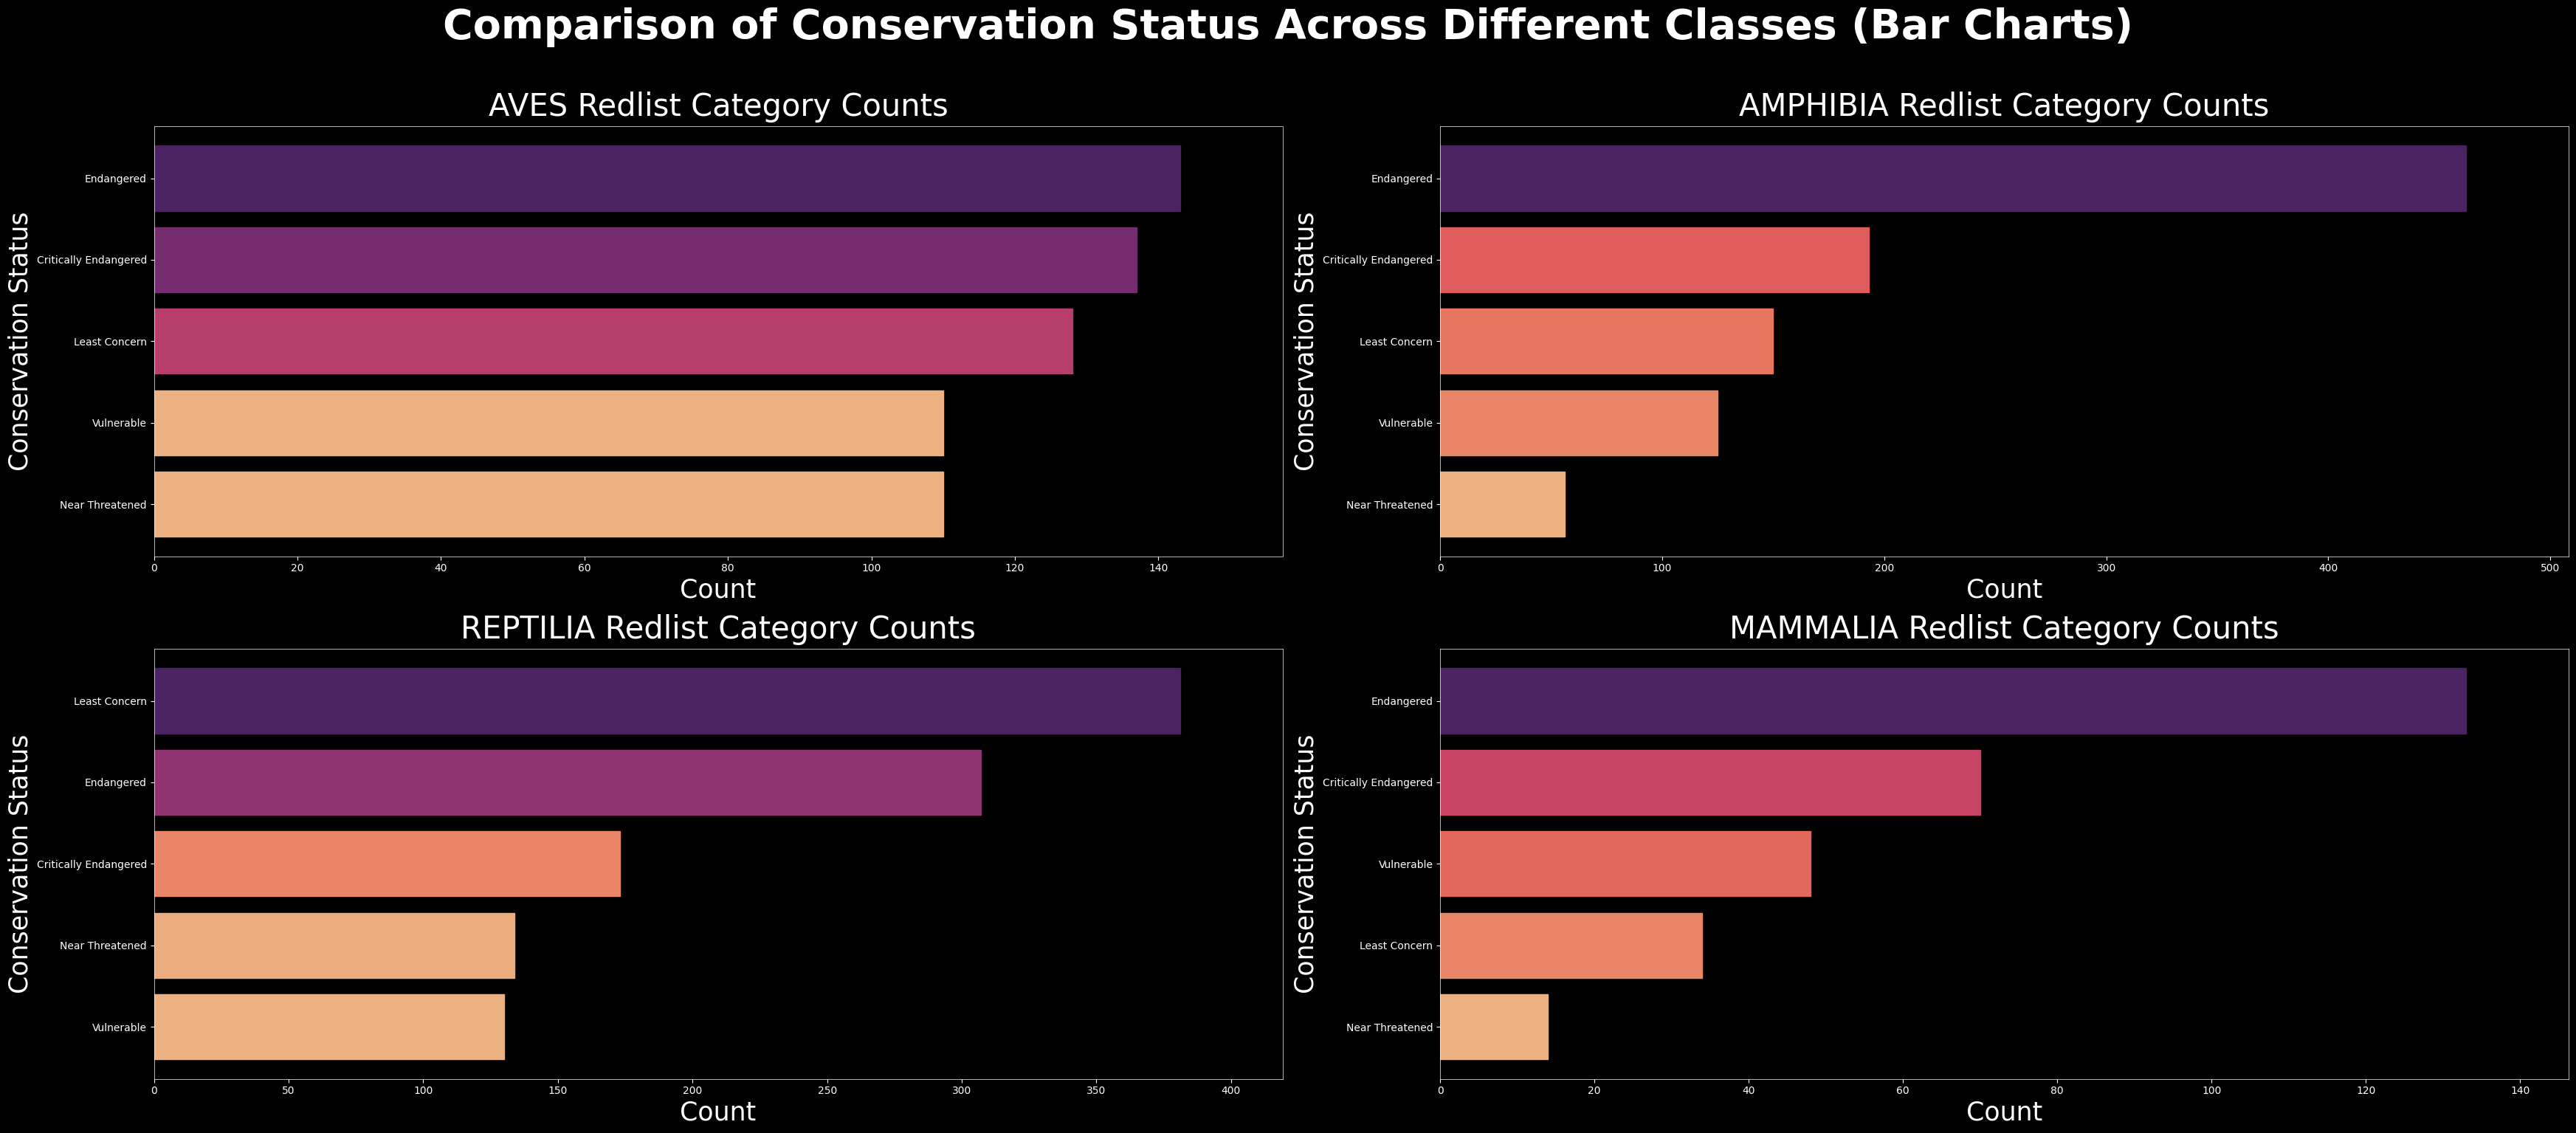

In [12]:
plt.style.use('dark_background')
class_names = ['AVES', 'AMPHIBIA', 'REPTILIA', 'MAMMALIA']
redlist_categories = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Least Concern', 'Near Threatened']

def plot_bar_chart(ax, class_name, df):
    category_counts = df['redlistCategory'].value_counts().reindex(redlist_categories, fill_value=0).sort_values(ascending=False)
    values = category_counts.values
    labels = category_counts.index
    normalized = np.zeros_like(values, dtype=float) if values.max() == values.min() else (values - values.min()) / (values.max() - values.min())
    cmap = plt.get_cmap('flare')
    colors = [cmap(val) for val in normalized]
    y_positions = np.arange(len(values))
    bars = ax.barh(y_positions, values, edgecolor='none')
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    ax.invert_yaxis()
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.5)
        spine.set_edgecolor('white')
    ax.set_title(f'{class_name} Redlist Category Counts', fontsize=30, pad=10)
    ax.set_xlabel('Count', fontsize=25)
    ax.set_ylabel('Conservation Status', fontsize=25)
    ax.set_xlim(0, values.max() * 1.1 if values.max() > 0 else 1)
    


df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)

fig_bar, axes_bar = plt.subplots(2, 2, figsize=(35, 15))
axes_bar = axes_bar.flatten()

for idx, class_name in enumerate(class_names):
    df_class = df[df['className'] == class_name]
    plot_bar_chart(axes_bar[idx], class_name, df_class)
        
fig_bar.suptitle('Comparison of Conservation Status Across Different Classes (Bar Charts)', fontsize=40, y=1.02,fontweight='bold')
fig_bar.tight_layout()
plt.show()


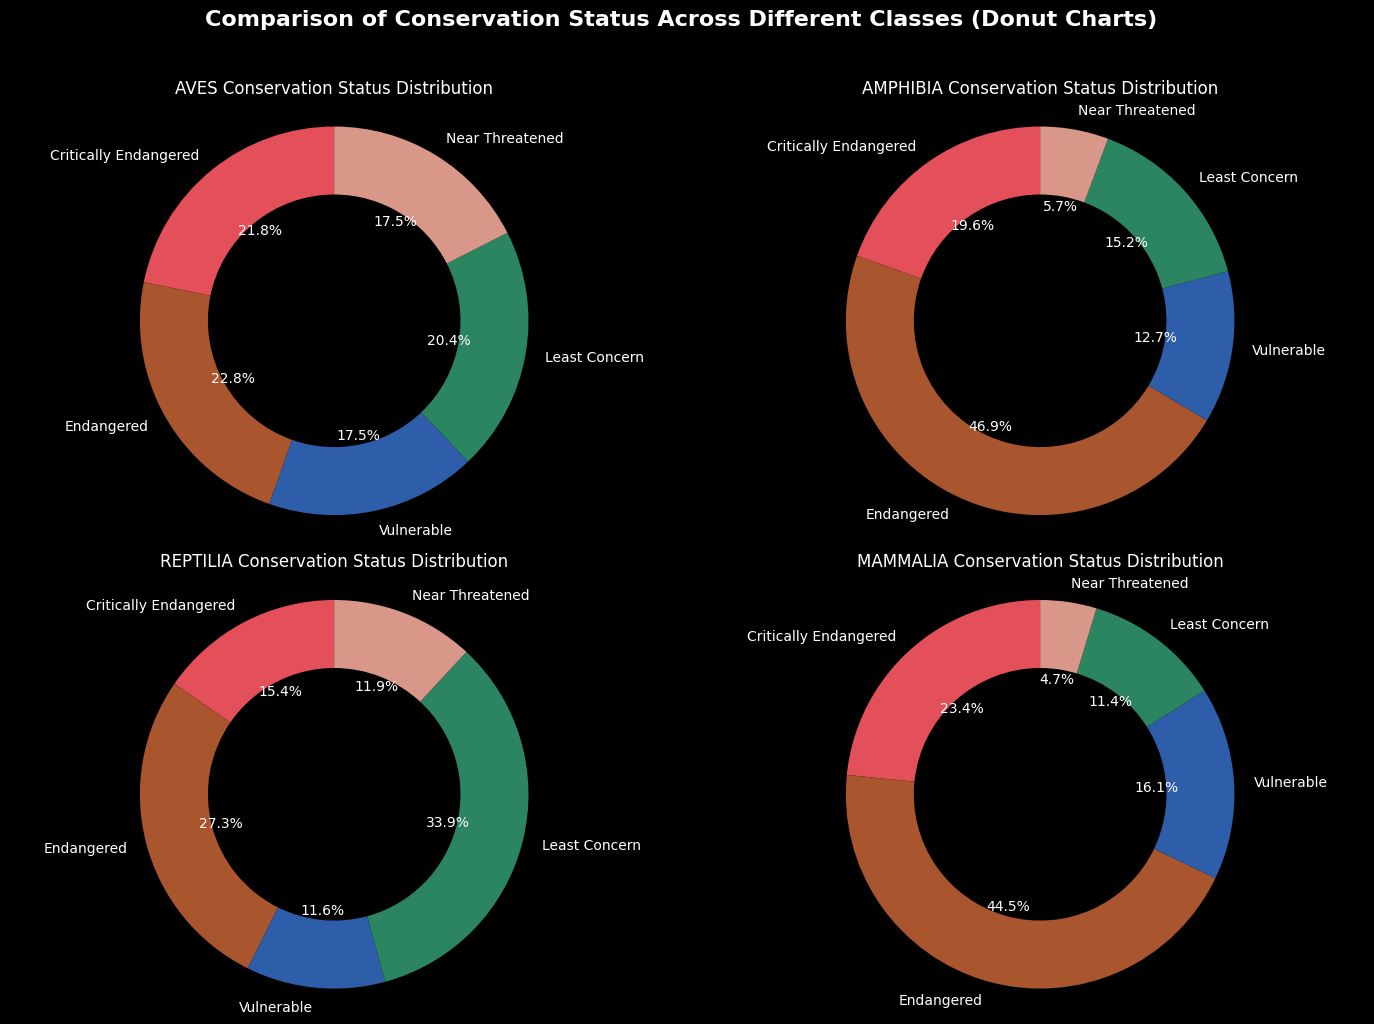

In [13]:
plt.style.use('dark_background')
class_names = ['AVES', 'AMPHIBIA', 'REPTILIA', 'MAMMALIA']
redlist_categories = ['Critically Endangered', 'Endangered', 'Vulnerable', 'Least Concern', 'Near Threatened']
palette = {'Endangered': "#a9552e", 'Vulnerable': "#2e5da9", 'Critically Endangered': "#e35059", 'Near Threatened': "#d89788", 'Least Concern': "#2b8560"}

def plot_donut_chart(ax, class_name, df):
    category_counts = df['redlistCategory'].value_counts()
    category_counts = category_counts.reindex(redlist_categories, fill_value=0)
    colors = [palette[cat] for cat in category_counts.index]
    wedges, texts, autotexts = ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.35, edgecolor='none'))
    ax.axis('equal')
    ax.set_title(f'{class_name} Conservation Status Distribution', fontsize=12, pad=10)
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)

df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)
fig_donut, axes_donut = plt.subplots(2, 2, figsize=(14, 10))
axes_donut = axes_donut.flatten()
for idx, class_name in enumerate(class_names):
    df_class = df[df['className'] == class_name]
    plot_donut_chart(axes_donut[idx], class_name, df_class)
fig_donut.suptitle('Comparison of Conservation Status Across Different Classes (Donut Charts)', fontsize=16, y=1.02, fontweight='bold')
fig_donut.tight_layout()
plt.show()


## Analysis

As can be seen from the chart there are

# What is the relationship between natural disaster impact and conservation status?

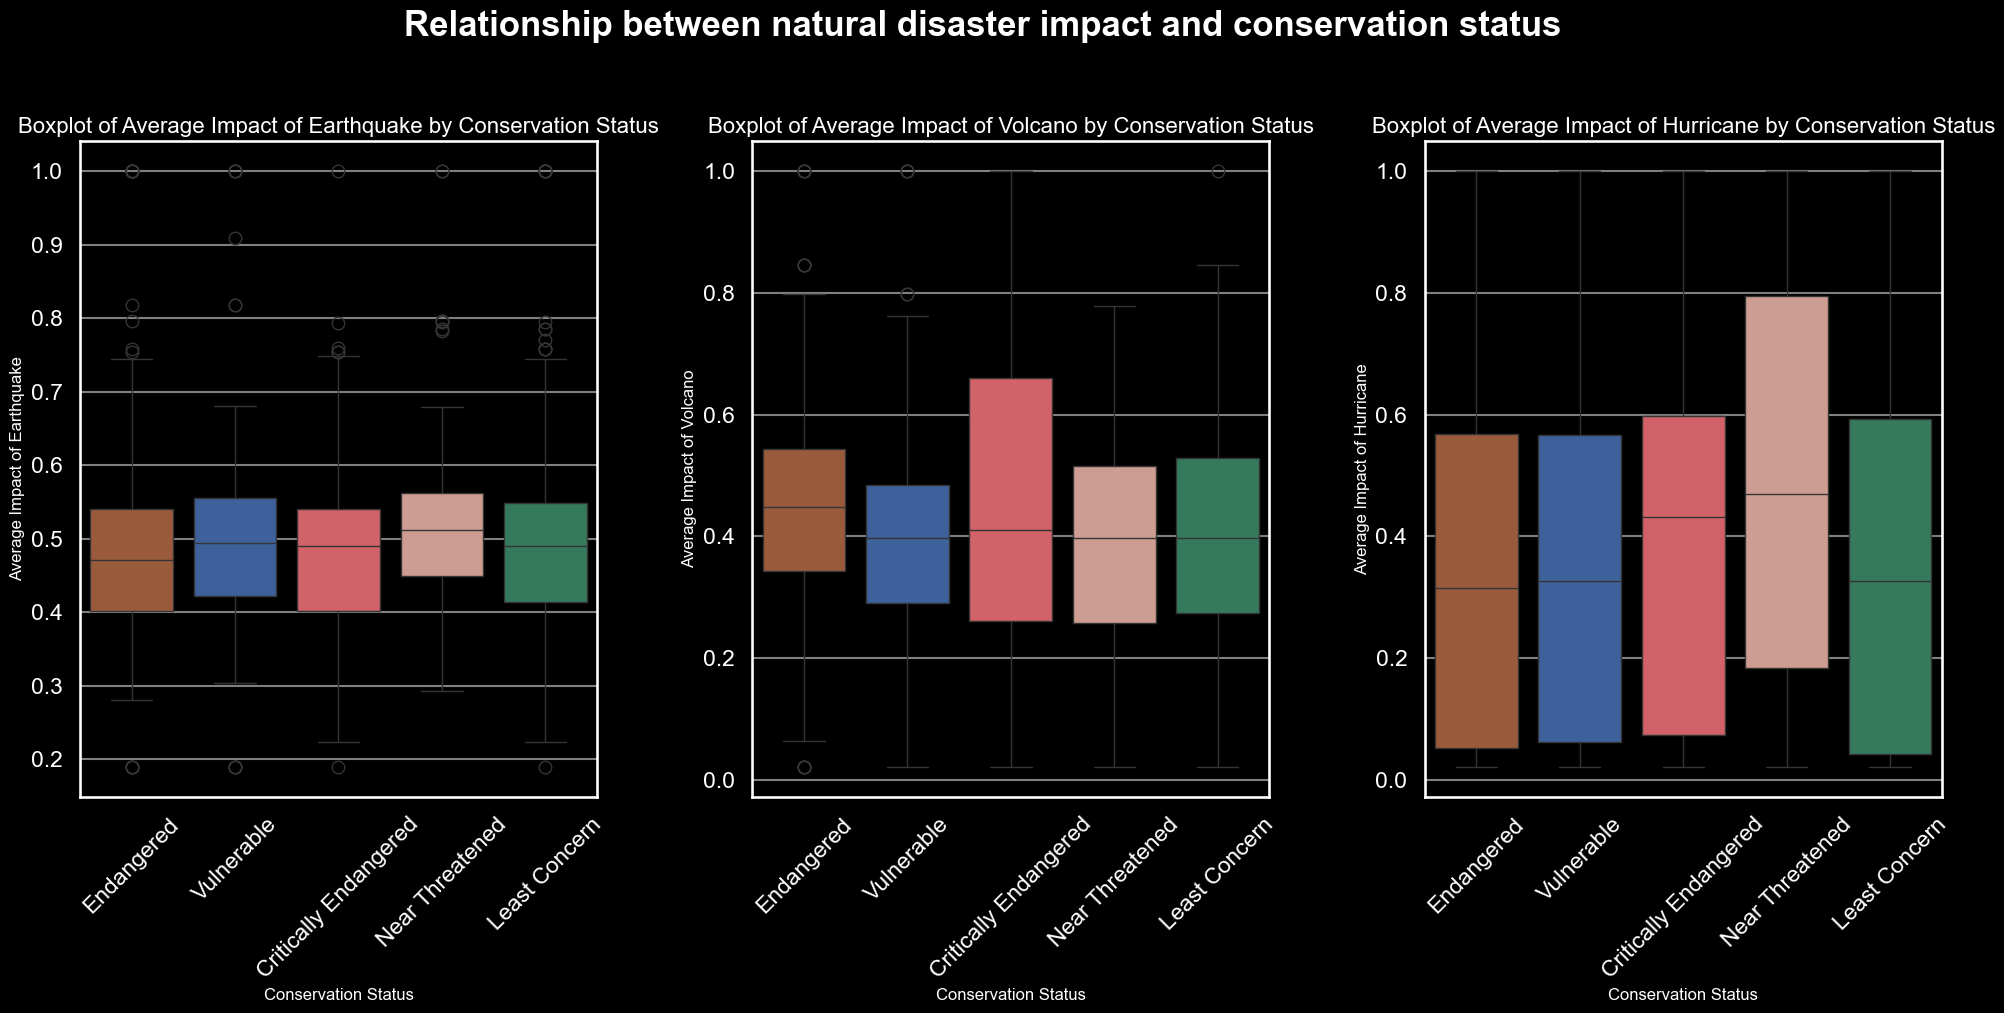

In [14]:
sns.set_theme(context="talk", rc={
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "grid.color": "gray",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.labelcolor": "white"
})

df = pd.concat([df_amphibia, df_aves, df_mammalia, df_reptilia], ignore_index=True)

impact_cols = [
    'avg_impact_sum_final_ear',
    'avg_impact_sum_final_vul',
    'avg_impact_sum_final_hur'
]

col_title_map = {
    'avg_impact_sum_final_ear': 'Average Impact of Earthquake',
    'avg_impact_sum_final_vul': 'Average Impact of Volcano',
    'avg_impact_sum_final_hur': 'Average Impact of Hurricane'
}

palette = {
    'Endangered': "#a9552e",
    'Vulnerable': "#2e5da9",
    'Critically Endangered': "#e35059",
    'Near Threatened': "#d89788",
    'Least Concern': "#2b8560"
}

fig, axes = plt.subplots(1,3, figsize=(20, 10))

for i, col in enumerate(impact_cols):
    ax = axes[i]
    sns.boxplot(
        data=df,
        x='redlistCategory',
        y=col,
        hue='redlistCategory',
        ax=ax,
        palette=palette,
        dodge=False
    )
    ax.set_title(f'Boxplot of {col_title_map[col]} by Conservation Status', fontsize=16, color='white')
    ax.set_xlabel('Conservation Status', fontsize=12, color='white')
    ax.set_ylabel(col_title_map[col], fontsize=12, color='white')
    ax.tick_params(axis='x', rotation=45, colors='white')
    ax.tick_params(axis='y', colors='white')

fig.suptitle('Relationship between natural disaster impact and conservation status', fontsize=25, color='white', y=1.02,fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


# What are the risk levels different disasters have on different animal species?

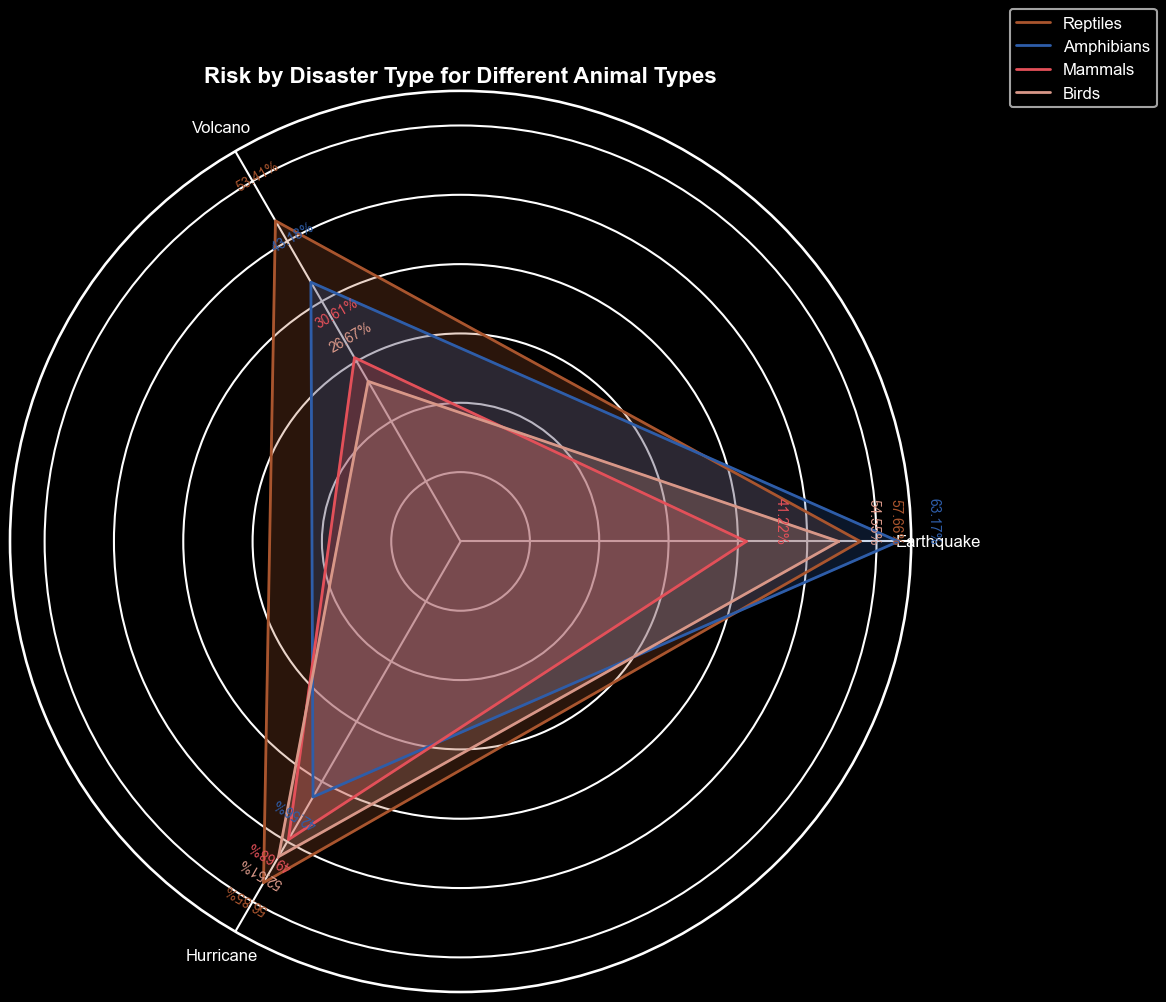

In [15]:
def calculate_risk(df):
    plt.style.use('dark_background')
    disaster_column = [10, 18,26]

    risk_list = []

    def risk_percentage(df):
        return df['high-risk'] / (df['high-risk'] + df['risk'])

    for column in disaster_column:
        disaster_df = df.iloc[:, column].value_counts().to_frame().T
        risk = risk_percentage(disaster_df)
        
        risk_list.append(risk)

    return risk_list
    
reptiles_risk = calculate_risk(df_reptilia)
amphibian_risk = calculate_risk(df_amphibia)
bird_risk = calculate_risk(df_aves)
mammal_risk = calculate_risk(df_mammalia)

animal_types = ['Reptiles', 'Amphibians', 'Mammals', 'Birds']
all_risk = [reptiles_risk, amphibian_risk, bird_risk, mammal_risk]
disaster_types = ['Earthquake', 'Volcano', 'Hurricane']

num_vars = len(disaster_types)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

all_risk = [risk + [risk[0]] for risk in all_risk]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

colors = ["#a9552e", "#2e5da9", "#e35059", "#d89788", "#2b8560"]

for i, risk in enumerate(all_risk):
    ax.plot(angles, risk, linewidth=2, label=animal_types[i], color=colors[i])
    ax.fill(angles, risk, alpha=0.25, color=colors[i])

    for j, (angle, value) in enumerate(zip(angles[:-1], risk[:-1])):  
        offset = 0.05 + (i * 0.07)
        rotation = np.degrees(angle)
        ax.text(angle, value.iloc[0] + 0.05, f"{value.iloc[0]*100:.2f}%", ha='center', fontsize=10, color=colors[i], rotation= rotation - 90)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(disaster_types, fontsize=12)

ax.set_yticklabels([])

ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=12, title_fontsize=14)

plt.title('Risk by Disaster Type for Different Animal Types', size=16,fontweight='bold')
plt.tight_layout()

plt.show()

## Analysis

The radar chart shows the percentage of high-risk that the disasters pose to each species.
We can observe that Reptiles are at the highest risk during volcano eruptions and hurricanes at 54.31% and 53.97% high-risk while amphibians are the most prone to earthquakes at 65.38% high-risk.
Mammals are the overall least prone to such natural disasters with an average 40.43% high-risk.
Hurricanes have an average high risk to all species types compared to earthquakes and volcanoes at 48.94% high-risk.
Earthquakes poses the highest risk to reptiles, amphibians and birds.

# Which natural disasters impact each species of animals most?

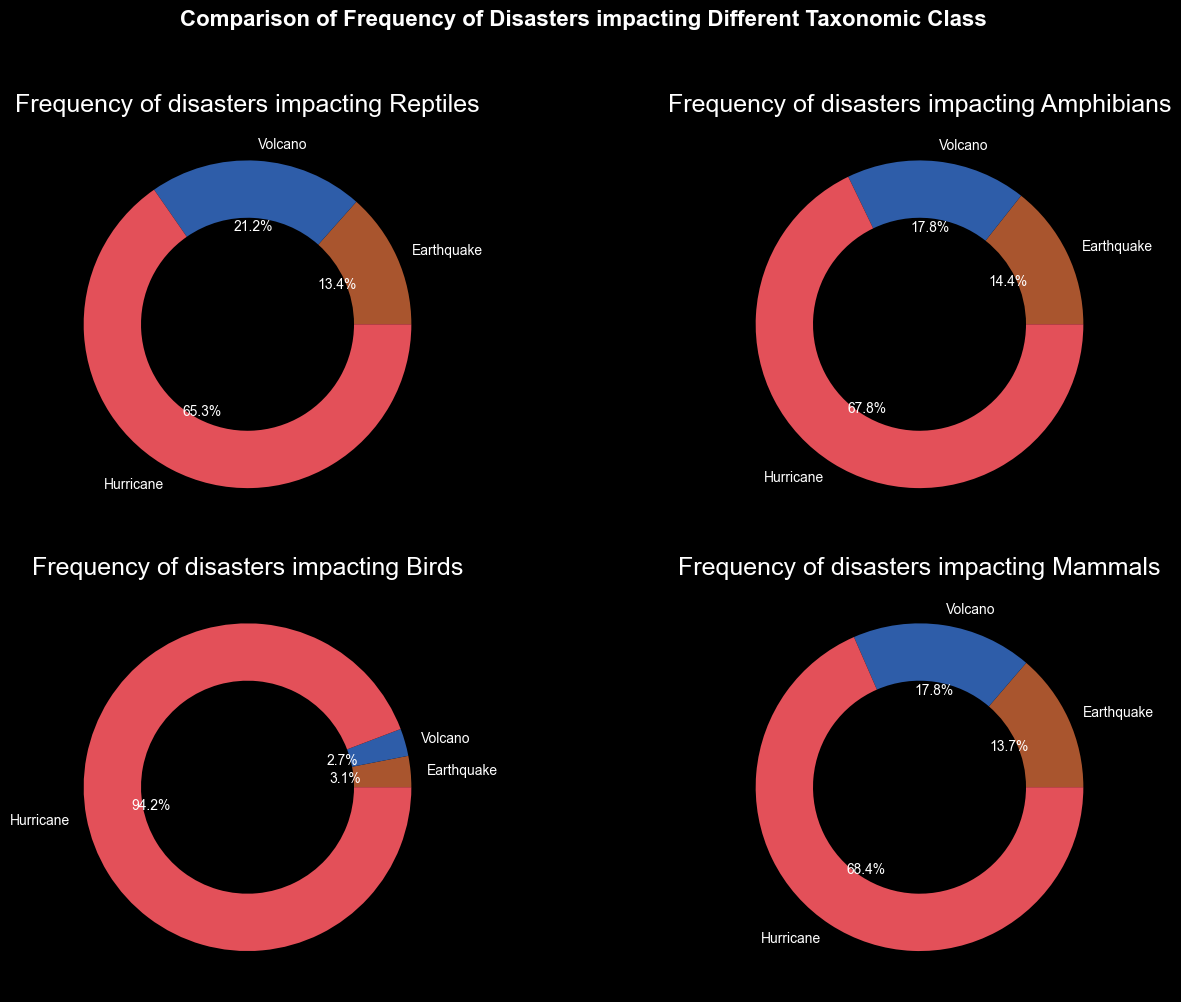

In [16]:
def plot_donut_chart(ax, df, title):
    frequency_list = []
    
    frequency_column = [9, 17,25]
    
    for column in frequency_column:
        frequency_list.append(df.iloc[:, column].mean())
    
    colors = ["#a9552e", "#2e5da9", "#e35059", "#d89788", "#2b8560"]

    wedges, autotexts, texts = ax.pie(frequency_list, labels=disaster_types,  wedgeprops=dict(width=0.35, edgecolor='none'), autopct='%1.1f%%', colors=colors)
    
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)
    
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plot_donut_chart(axs[0, 0], df_reptilia, "Frequency of disasters impacting Reptiles")
plot_donut_chart(axs[0, 1], df_amphibia, "Frequency of disasters impacting Amphibians")
plot_donut_chart(axs[1, 0], df_aves, "Frequency of disasters impacting Birds")
plot_donut_chart(axs[1, 1], df_mammalia, "Frequency of disasters impacting Mammals")

fig.suptitle("Comparison of Frequency of Disasters impacting Different Taxonomic Class", fontsize=16,y=1.01,fontweight='bold')

plt.tight_layout()

plt.show()


## Analysis

Hurricanes impact the most out of all the natural disasters with more than 60% of the disaster frequencies.Birds rarely get affected by volcanoes and earthquakes with 2.7% and 3.1% frequency respectively.

# Reference